<h1 align=center>Netflix Exploratory Data Analysis</h1>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Netflix_logo.svg/2560px-Netflix_logo.svg.png)

### Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


### Reading Data

In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

## Exploratory Data Analysis

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Check percentage of NULL on each column
df.isna().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [6]:
# Let's drop the null rows that has not date_adde
df.dropna(subset='date_added', inplace=True)

In [7]:
# Check duplication
df.duplicated().sum()

0

In [8]:
df['date_added'] = df['date_added'].str.strip()

In [9]:
# Change date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [10]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [11]:
# create new column to see how long from movie release to be added to Netflix platform
df['release_to_added'] = df['date_added'].dt.year - df['release_year']

# Analysis

**How is the trend of movies/series released?**

*Netflix was founded by Marc Randolph and Reed Hastings on **August 29, 1997**, in Scotts Valley, California. Hastings, a computer scientist and mathematician, was a co-founder of Pure Software, which was acquired by Rational Software that year for $750 million, the then biggest acquisition in Silicon Valley history. (Wikipedia)*

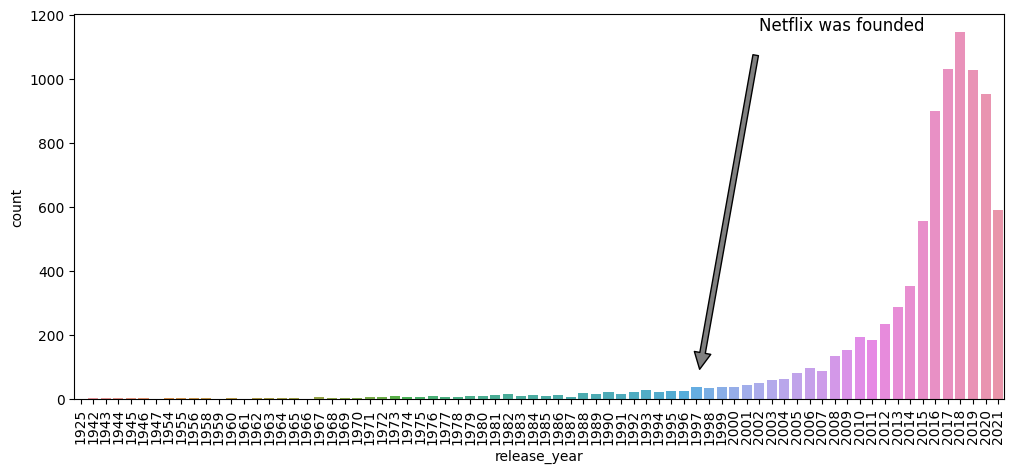

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.countplot(x=df['release_year'], ax=ax)
plt.xticks(rotation=90)

# Get the unique years from the x-axis in sorted order
unique_years = sorted(df['release_year'].unique())

# Find the position of 1997
if 1997 in unique_years:
    idx_1997 = unique_years.index(1997)

    # Annotate the year 1997 with an arrow and a note
    ax.annotate('Netflix was founded', 
                xy=(idx_1997, df['release_year'].value_counts()[1997]),  # position of the annotation (year 1997, its count)
                xytext=(idx_1997 + 5, df['release_year'].value_counts().max() + 5),  # position of the text
                arrowprops=dict(facecolor='gray', shrink=0.05), 
                fontsize=12, color='black')

plt.show()

**The number of movie releases has steadily risen since Netflix was founded, with a sharp exponential growth starting in 2008, reaching its peak in 2018.**

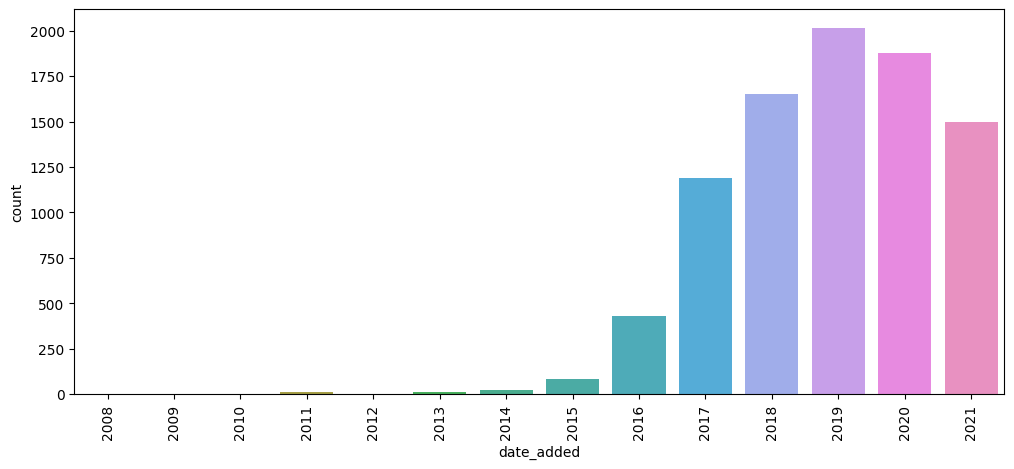

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.countplot(x=df['date_added'].dt.year.astype(int), ax=ax)
plt.xticks(rotation=90)
plt.show()

**Beginning in 2016, Netflix began to expand its selection of movies and series available on their platform**

**Which Country has most released?**